In [1]:
from thesaurus import Thesaurus

Loading BokehJS ...

In [2]:
import pickle
# Load as pickle
with open('../data/index_eng.pickle', 'rb') as f:
    data_pickle = pickle.load(f)
data_pickle

{'will': (66, 69),
 'time': (61, 11),
 'year': (6, 98),
 'people': (99, 82),
 'day': (90, 44),
 'man': (19, 85),
 'find': (4, 91),
 'thing': (20, 59),
 'woman': (83, 58),
 'life': (70, 53),
 'child': (0, 3),
 'work': (1, 29),
 'call': (57, 38),
 'school': (8, 9),
 'feel': (70, 54),
 'state': (68, 98),
 'family': (76, 94),
 'leave': (45, 96),
 'student': (6, 11),
 'group': (41, 72),
 'country': (7, 35),
 'help': (3, 93),
 'talk': (8, 21),
 'turn': (72, 79),
 'problem': (52, 47),
 'start': (98, 88),
 'hand': (57, 35),
 'place': (61, 22),
 'case': (59, 19),
 'week': (87, 44),
 'company': (56, 75),
 'system': (6, 96),
 'program': (25, 4),
 'hear': (37, 58),
 'question': (78, 30),
 'play': (13, 9),
 'government': (40, 98),
 'number': (45, 63),
 'move': (34, 73),
 'night': (25, 92),
 'live': (39, 51),
 'point': (22, 26),
 'hold': (14, 94),
 'bring': (19, 57),
 'happen': (89, 42),
 'water': (86, 27),
 'room': (20, 56),
 'write': (54, 23),
 'mother': (78, 94),
 'area': (60, 22),
 'money': (77,

In [3]:
from sklearn.cluster import SpectralClustering
import numpy as np

In [4]:
data = list(data_pickle.items())
data = [(word, coord[0],coord[1]) for word,coord in data]
pro_data = np.array(data, dtype=object)
pro_data

array([['will', 66, 69],
       ['time', 61, 11],
       ['year', 6, 98],
       ...,
       ['gaoler', 87, 79],
       ['carcinoid', 49, 0],
       ['tonus', 11, 80]], dtype=object)

In [5]:
X = pro_data[:,[1,2]][:100]

In [6]:
n_clusters = 10
clustering = SpectralClustering(n_clusters=n_clusters,
                                assign_labels='discretize',
                                random_state=0).fit(X)

In [7]:
clustering.labels_

array([4, 4, 0, 9, 9, 9, 0, 0, 2, 2, 8, 0, 0, 2, 2, 4, 0, 4, 2, 4, 0, 0,
       2, 8, 0, 1, 0, 4, 4, 9, 4, 0, 3, 9, 0, 2, 4, 8, 4, 9, 9, 9, 0, 0,
       9, 0, 0, 4, 0, 4, 8, 9, 3, 4, 3, 6, 9, 0, 0, 3, 4, 0, 9, 4, 4, 2,
       4, 4, 0, 0, 2, 2, 0, 4, 0, 9, 4, 6, 4, 9, 4, 0, 4, 2, 4, 0, 4, 2,
       0, 0, 0, 2, 9, 0, 4, 1, 9, 0, 4, 0])

In [8]:
# list of foreground names
# foreground_names = ['foreground name1', ...]
clustered_text = dict()
for i in range(10):
    clustered_text[i] =[pro_data[j][0] for j in range(len(clustering.labels_)) if clustering.labels_[j]==i]
clustered_text

{0: ['year',
  'find',
  'thing',
  'work',
  'call',
  'family',
  'country',
  'help',
  'problem',
  'hand',
  'system',
  'question',
  'hold',
  'bring',
  'water',
  'room',
  'mother',
  'eye',
  'job',
  'issue',
  'friend',
  'father',
  'hour',
  'stand',
  'city',
  'community',
  'change',
  'team',
  'minute',
  'lead',
  'parent',
  'create'],
 1: ['start', 'watch'],
 2: ['woman',
  'life',
  'school',
  'feel',
  'student',
  'talk',
  'play',
  'house',
  'sit',
  'power',
  'continue',
  'learn',
  'idea'],
 3: ['program', 'fact', 'lot', 'word'],
 4: ['will',
  'time',
  'state',
  'leave',
  'group',
  'place',
  'case',
  'company',
  'government',
  'move',
  'write',
  'area',
  'month',
  'business',
  'kind',
  'head',
  'provide',
  'service',
  'game',
  'member',
  'law',
  'car',
  'include',
  'set',
  'president',
  'understand',
  'face'],
 5: [],
 6: ['study', 'pay'],
 7: [],
 8: ['child', 'turn', 'number', 'money'],
 9: ['people',
  'day',
  'man',
  'we

In [9]:
# texts is the dictionary with all source texts that will be preprocessed
# texts = {'foreground name1': [source text1, source text2, ...], ...}
texts = dict()

foreground_names = []

for i in range(n_clusters):
    if len(clustered_text[i]) > 0:
        foreground_name = 'Label ' + str(i)
        texts[foreground_name] = clustered_text[i]
        foreground_names.append(foreground_name)

In [10]:
obj = Thesaurus(lang='eng')

[nltk_data] Downloading package words to /home/karam/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/karam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
obj.set_spacy_model()

/home/karam/Documents/workspace/lib/python3.9/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_md' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [12]:
# dictionary with the embeddings and tokens of each foreground unit
# processed_foregrounds = {'foreground_name1': {'embeds': embeddings, 'words': tokens}, ...}
processed_foregrounds = obj.process_foreground(foreground_names, texts)

100%|██████████| 2/2 [00:00<00:00, 41.07it/s]

100%|██████████| 2/2 [00:00<00:00, 46.86it/s]

100%|██████████| 8/8 [00:02<00:00,  3.59it/s]


In [13]:
background_embeds, background_words = obj.import_background()

In [14]:
obj.set_som()

In [15]:
print("Go to https://nbviewer.org/github/DinarZayahov/thesaurus/blob/master/ThesaurusVisualization.ipynb to see the outputs of the notebook as the GitHub doesn't render dynamic output")
obj.show_map(background_embeds, background_words, foreground_names, processed_foregrounds)

Go to https://nbviewer.org/github/DinarZayahov/thesaurus/blob/master/ThesaurusVisualization.ipynb to see the outputs of the notebook as the GitHub doesn't render dynamic output


# Clustering using SOM

In [1]:
from thesaurus import Thesaurus

Loading BokehJS ...

In [2]:
obj = Thesaurus(lang='eng')

[nltk_data] Downloading package words to /home/karam/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/karam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
obj.set_spacy_model()

/home/karam/Documents/workspace/lib/python3.9/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_md' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
background_embeds, background_words = obj.import_background()

In [5]:
obj.set_som()

In [6]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [7]:
tmp = []
for x in tqdm(background_embeds[:10000]):
    tmp.append(obj.model.winner(x))
winner_coordinates = np.array(tmp).T

100%|██████████| 10000/10000 [04:19<00:00, 38.49it/s]


In [8]:
som_shape = (78,78)
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [9]:
len(cluster_index)

10000

In [10]:
len(np.unique(cluster_index))

3053

In [11]:
data = pd.DataFrame(background_embeds[:10000])
data = data.values

In [12]:
texts = dict()

# list of foreground names
# foreground_names = ['foreground name1', ...]
foreground_names = []

for c in np.unique(cluster_index):
    foreground_name1 = 'cluster='+str(c)
    texts[foreground_name1] = [data[cluster_index == c, :]]
    foreground_names.append(foreground_name1)

In [13]:
new_text = {}

for key in tqdm(texts.keys()):
    tmp = []
    for value in texts[key]:
        for i in range(len(background_embeds[:10000])):
            if (value[0] == background_embeds[i]).all():
                tmp.append(background_words[i])
    new_text[key] = tmp

100%|██████████| 3053/3053 [02:23<00:00, 21.30it/s]


In [14]:
processed_foregrounds = obj.process_foreground(foreground_names, new_text)

100%|██████████| 1/1 [00:00<00:00, 15.85it/s]

100%|██████████| 1/1 [00:00<00:00, 38.36it/s]

100%|██████████| 1/1 [00:00<00:00, 106.38it/s]

100%|██████████| 1/1 [00:00<00:00, 37.75it/s]

100%|██████████| 1/1 [00:00<00:00, 35.12it/s]

100%|██████████| 1/1 [00:00<00:00, 27.60it/s]

100%|██████████| 1/1 [00:00<00:00, 32.66it/s]

100%|██████████| 1/1 [00:00<00:00, 34.26it/s]

100%|██████████| 1/1 [00:00<00:00, 36.76it/s]

100%|██████████| 1/1 [00:00<00:00, 36.91it/s]

100%|██████████| 1/1 [00:00<00:00, 39.71it/s]

100%|██████████| 1/1 [00:00<00:00, 39.73it/s]

100%|██████████| 1/1 [00:00<00:00, 38.37it/s]

100%|██████████| 1/1 [00:00<00:00, 32.68it/s]

100%|██████████| 1/1 [00:00<00:00, 30.88it/s]

100%|██████████| 1/1 [00:00<00:00, 30.40it/s]

100%|██████████| 1/1 [00:00<00:00, 66.62it/s]

100%|██████████| 1/1 [00:00<00:00, 57.66it/s]

100%|██████████| 1/1 [00:00<00:00, 68.55it/s]

100%|██████████| 1/1 [00:00<00:00, 105.77it/s]

100%|██████████| 1/1 [00:00<00:00, 74.22it/s]

100%|██████

In [ ]:
print("Go to https://nbviewer.org/github/DinarZayahov/thesaurus/blob/master/ThesaurusVisualization.ipynb to see the outputs of the notebook as the GitHub doesn't render dynamic output")
obj.show_map(background_embeds, background_words, foreground_names, processed_foregrounds)

Go to https://nbviewer.org/github/DinarZayahov/thesaurus/blob/master/ThesaurusVisualization.ipynb to see the outputs of the notebook as the GitHub doesn't render dynamic output


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


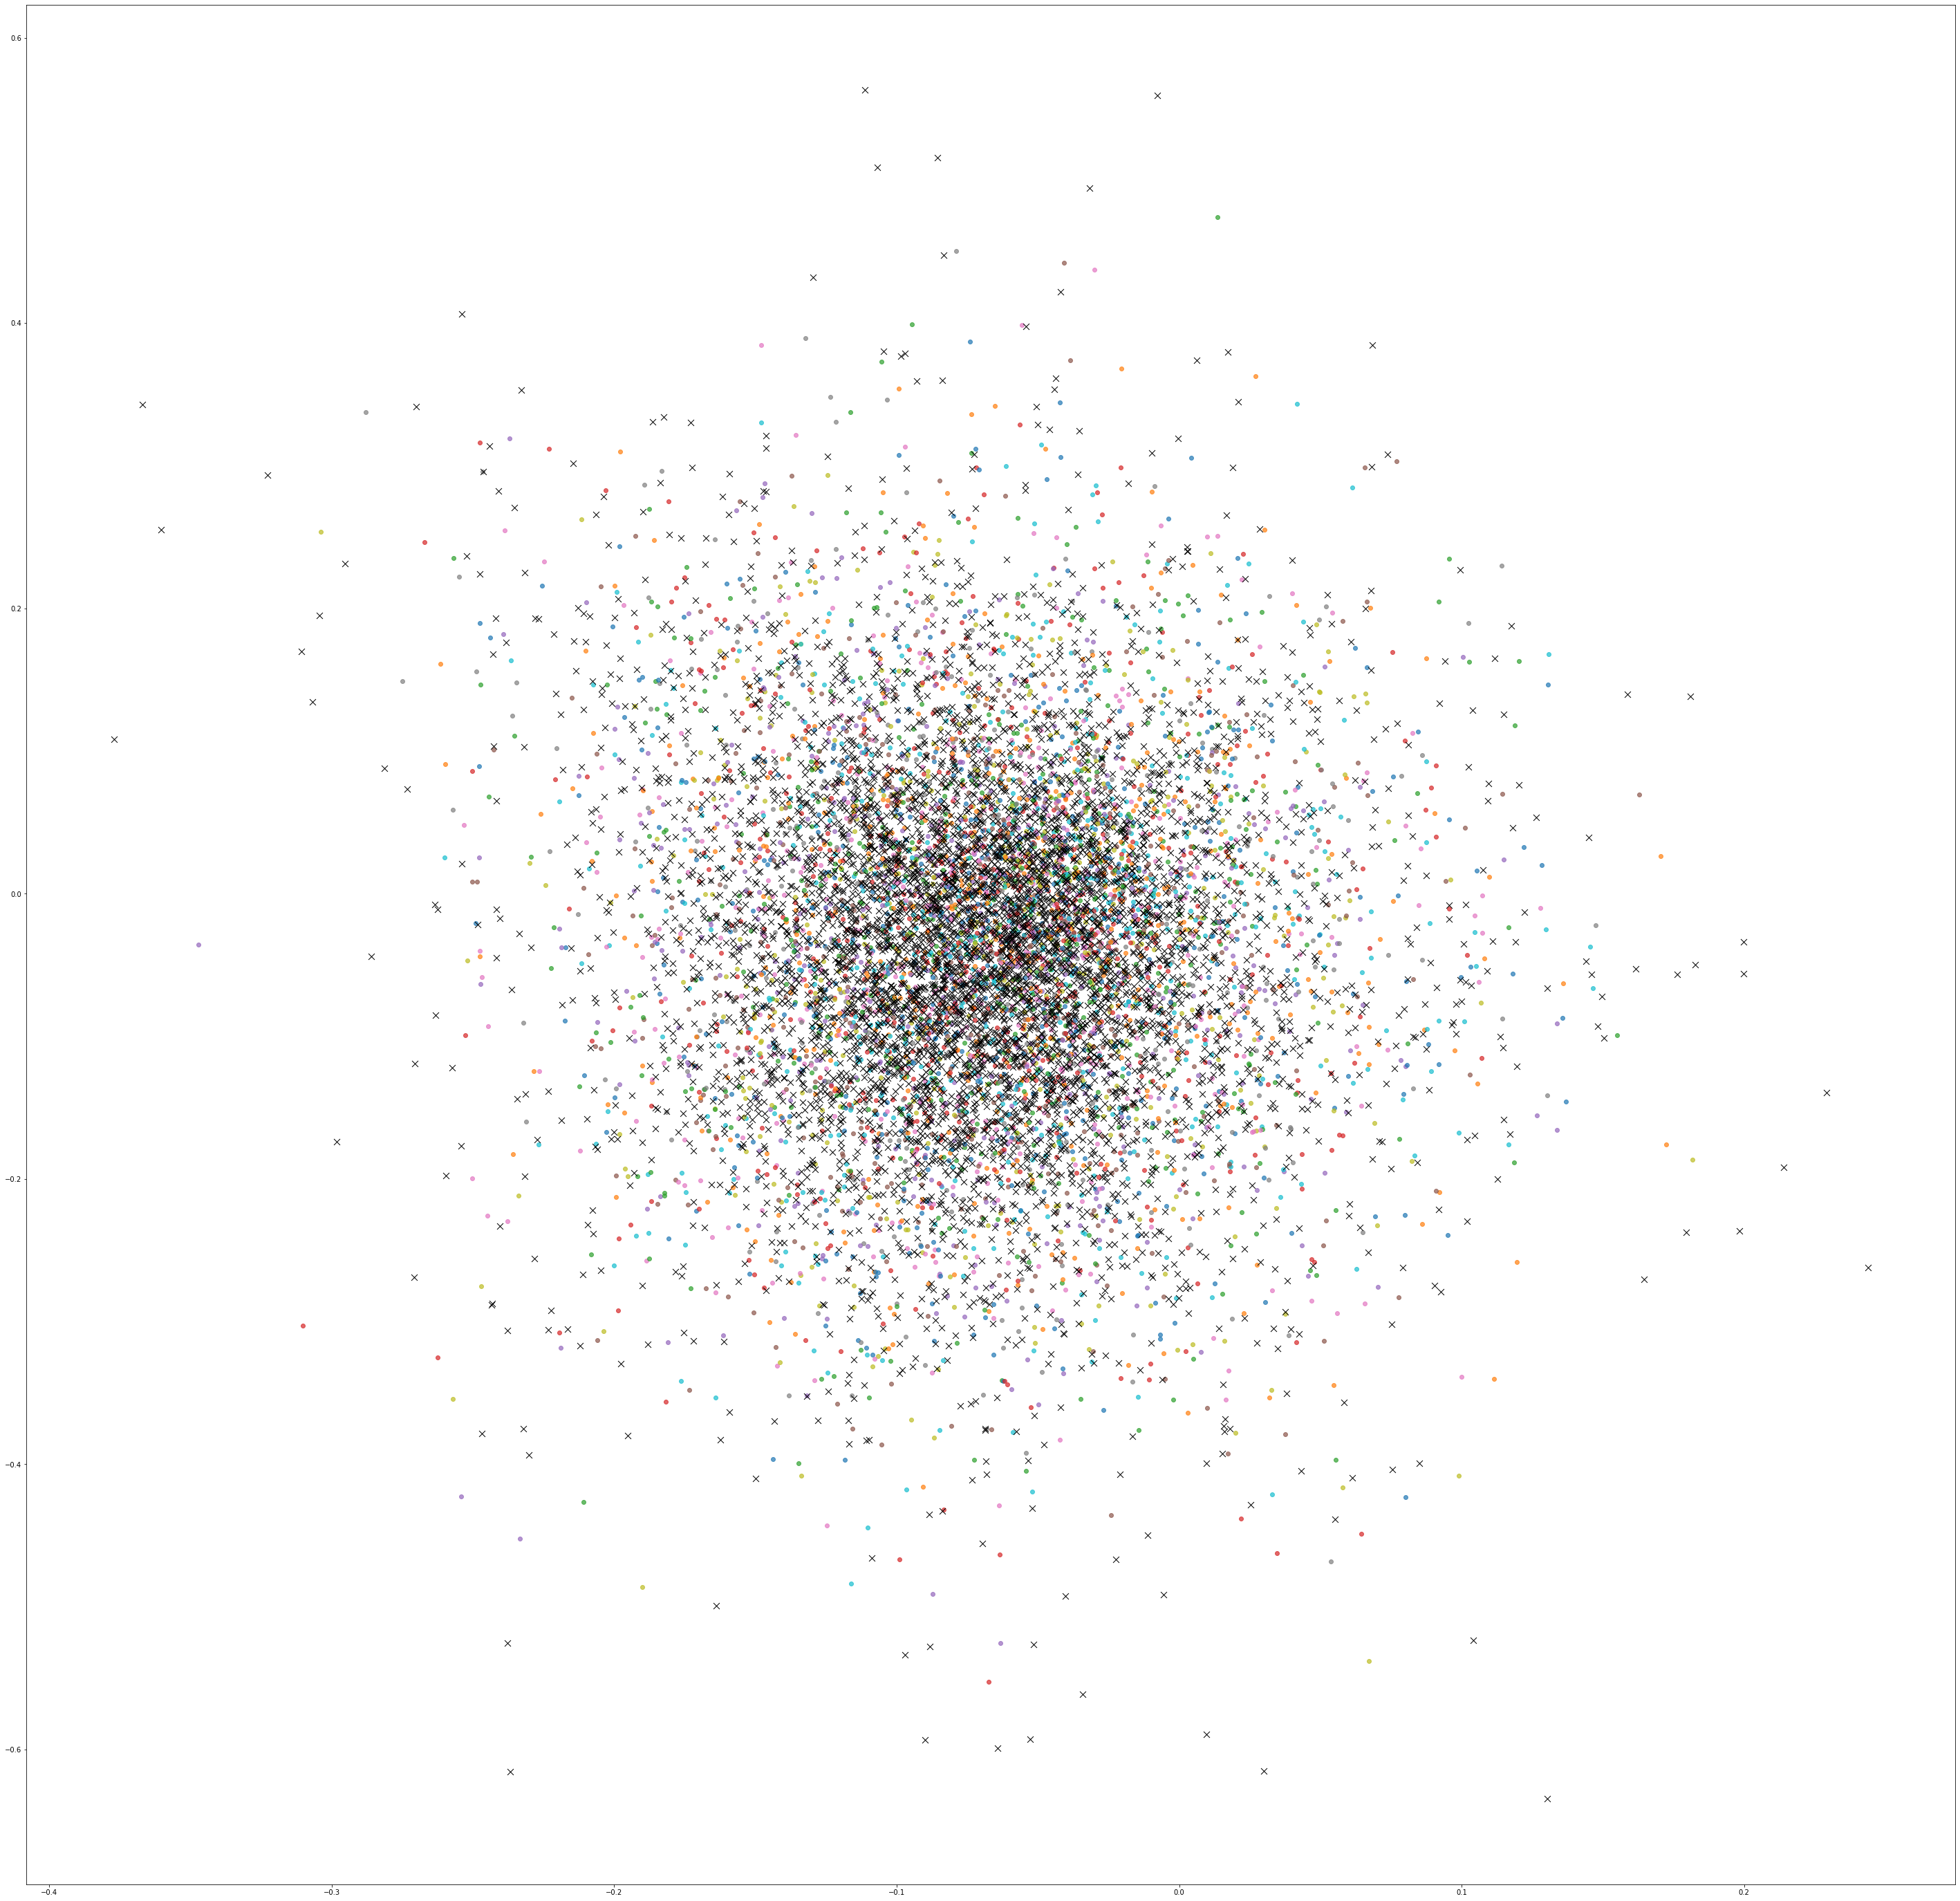

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(50,50))
# plotting the clusters using the first 2 dimensions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in obj.model.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=1, color='k', label='centroid')
#plt.legend()
plt.savefig('my_plot.pdf')

# Train and cluster

In [7]:
import pickle
import numpy as np
from tqdm import tqdm
from minisom import MiniSom
import pandas as pd

In [2]:
# Load as pickle
with open('../data/coca_embeds.pickle', 'rb') as f:
    embeddings_b = pickle.load(f)
embeddings_b = embeddings_b[:1000]

In [3]:
sigma = 2
lr = 5
iterations = 50000

grid_size = int(np.ceil(np.sqrt(len(embeddings_b))))

som = MiniSom(grid_size, grid_size, len(embeddings_b[0]), sigma=sigma, learning_rate=lr,
              activation_distance='euclidean', topology='hexagonal', neighborhood_function='gaussian',
              random_seed=10)

som.train(embeddings_b, iterations, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.693295618534815


In [4]:
tmp = []
for x in tqdm(embeddings_b):
    tmp.append(som.winner(x))
winner_coordinates = np.array(tmp).T

100%|██████████| 1000/1000 [00:03<00:00, 303.47it/s]


In [5]:
som_shape = (grid_size,grid_size)
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [8]:
data = pd.DataFrame(embeddings_b)
data = data.values

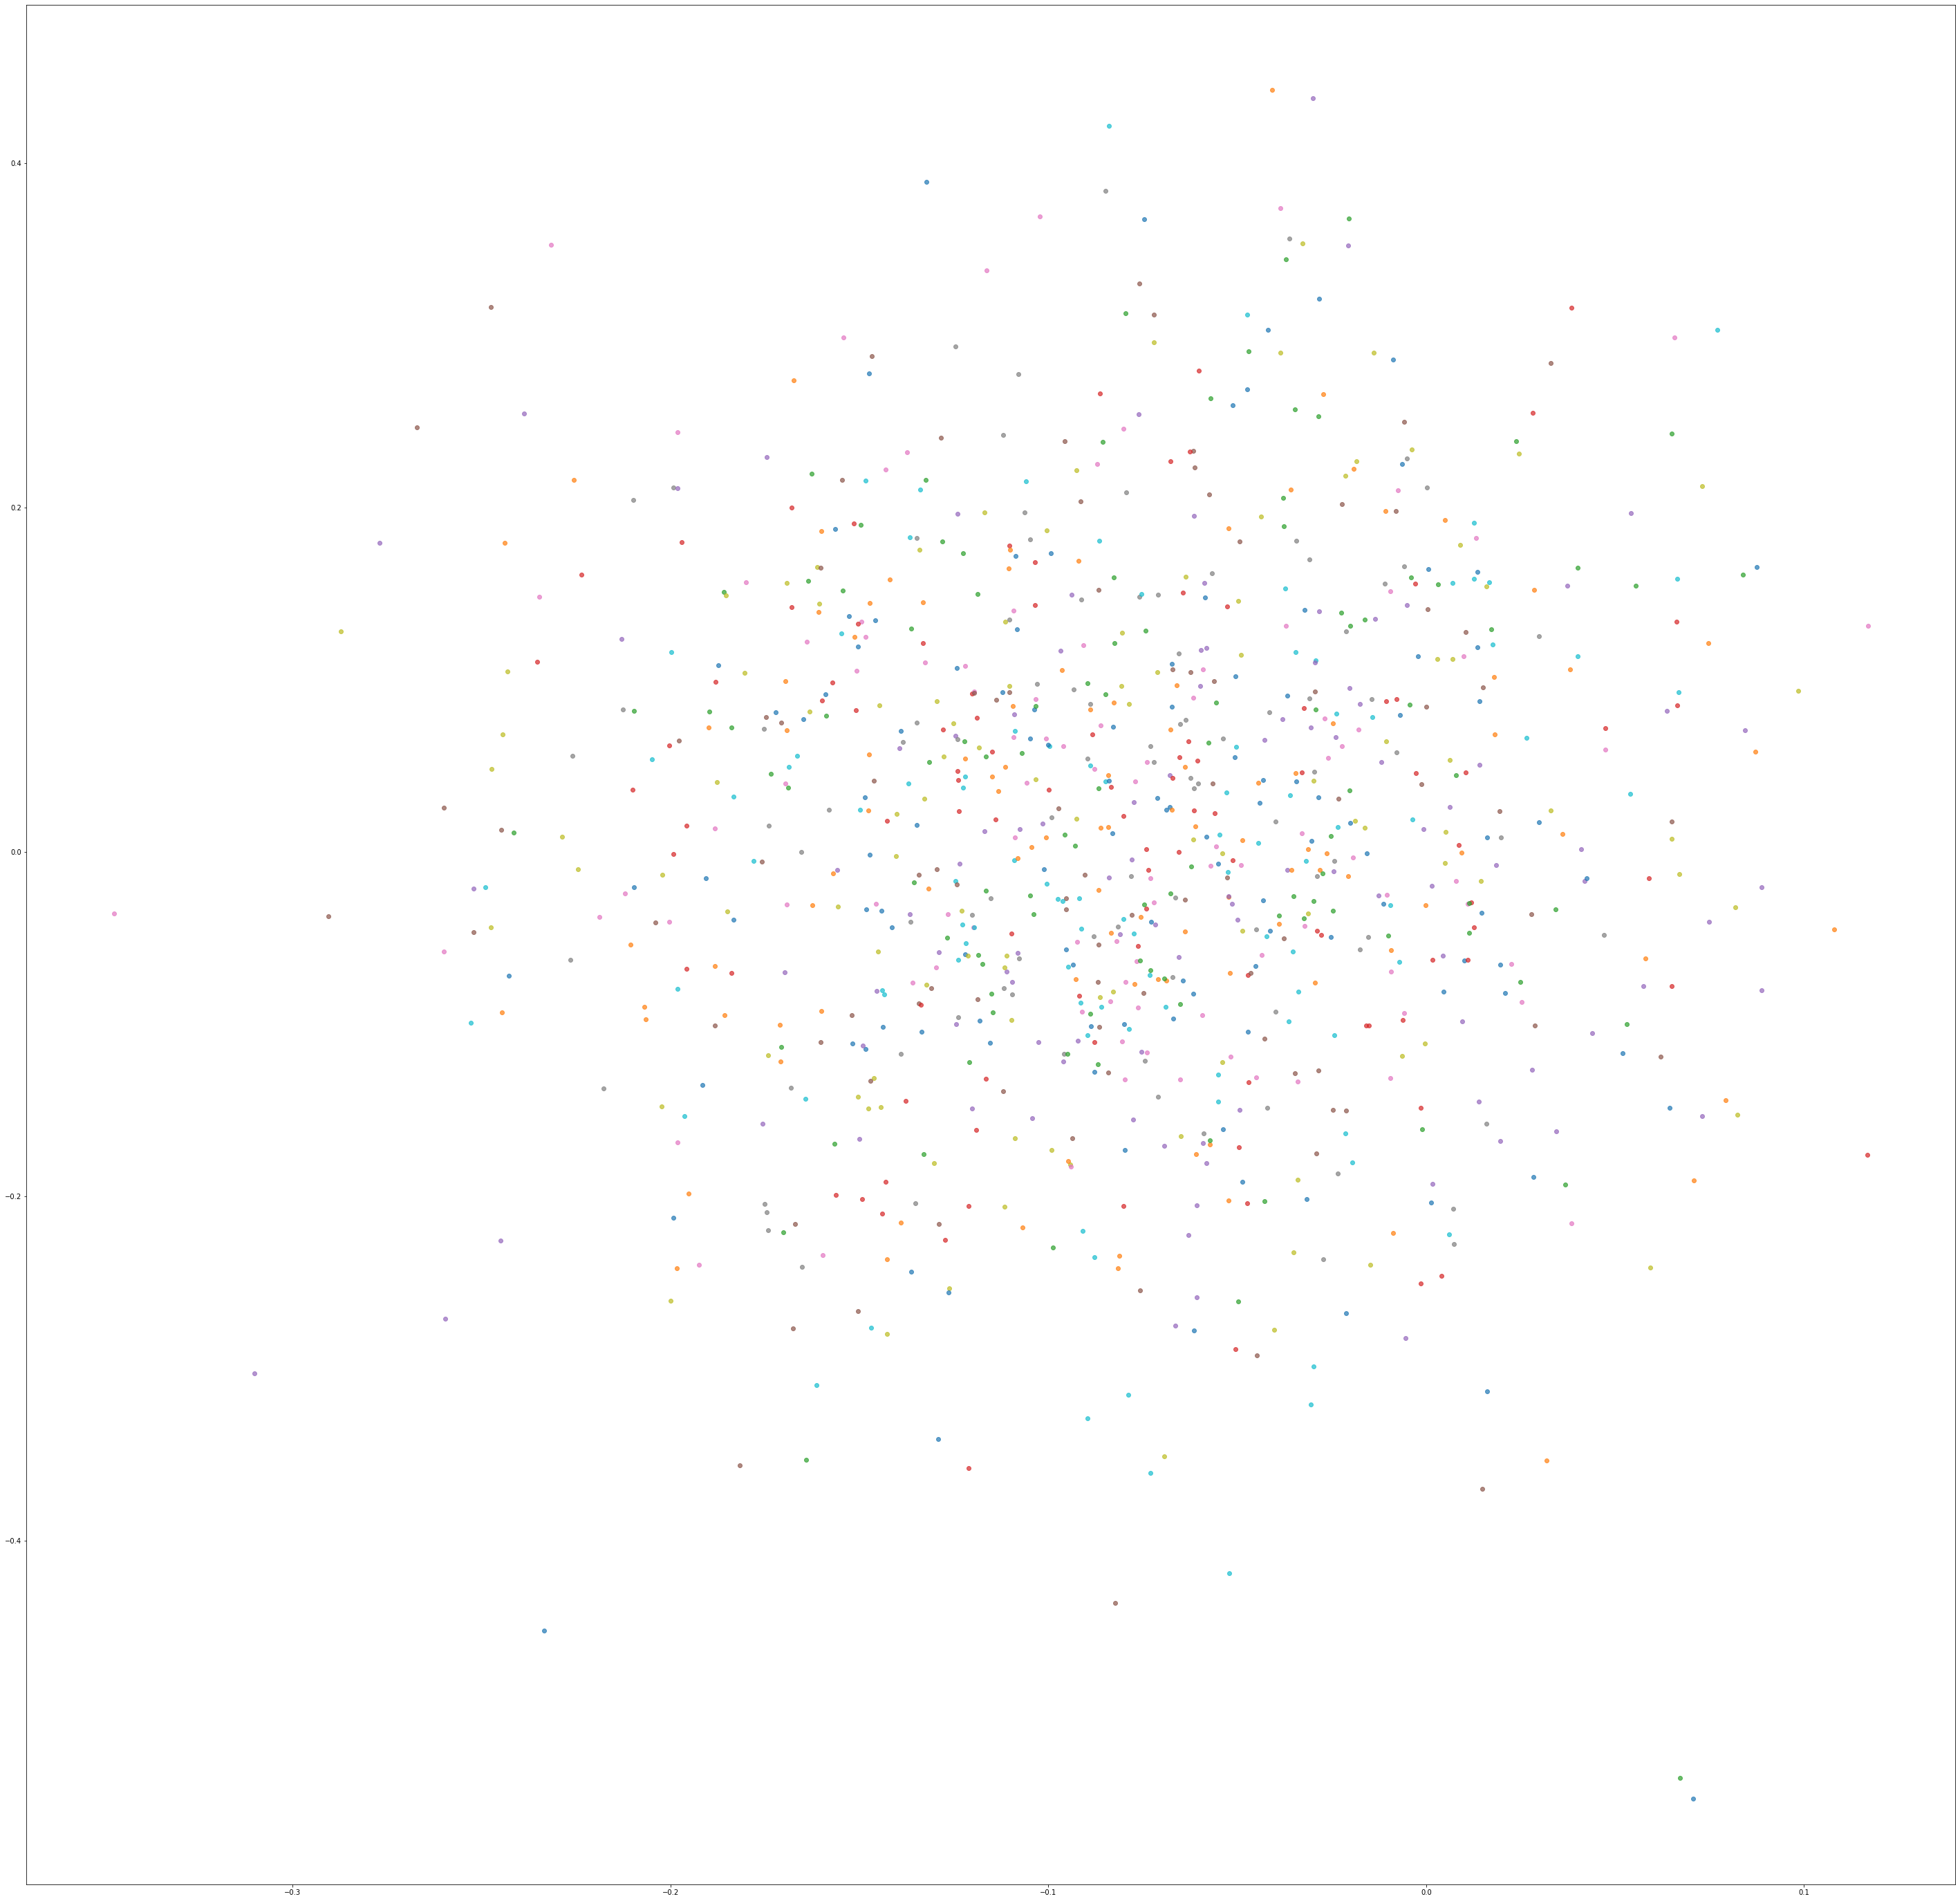

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(50,50))
# plotting the clusters using the first 2 dimensions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
# for centroid in som.get_weights():
#     plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
#                 s=80, linewidths=1, color='k', label='centroid')
#plt.legend()
plt.savefig('my_plot.pdf')

In [24]:
centroid = som.get_weights()

In [27]:
centroid[0]

array([[ 1.140811  ,  0.33367886],
       [-0.29377925,  0.42139763],
       [-0.4334429 , -1.15961721]])